## How much is a week's accommodation in Boston for Airbnb in the marathon period?

### Table of Contents
1. [Business Understanding](#buiness)
2. [Libraries](#libraries)
3. [Functions](#functions)
4. [Exploratory Data Analysis](#eda)   
5. [Conclusion](#conclusion)

### <a href='#business'></a>1. Business Understanding

Booking accommodation, for example, can be done through Airbnb, which offers different accommodation options and with different values. In this notebook, I will analyze the data provided by Airbnb for Boston accommodation, from September 2016 to September 2017, and show what options are in mind for staying during the marathon period. To learn more about the Boston Marathon, visit [Boston Marathon](https://pt.wikipedia.org/wiki/Maratona_de_Boston).

This database contains data from several accommodations, showing the price variation over a period of 1 year. They also describe the accommodations in several ways. I will explore this information to try to answer some questions.

I will answer 3 questions in this notebook.

1. Is there a difference in the price of accommodation during the year?
2. What is the most expensive neighborhood? And which is the cheapest?
3. What are the accommodation changes for two people? And for more than two people?

### <a id='libraries'></a>2. Libraries

In [81]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from functools import reduce

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

### <a id='functions'></a>3. Functions

In [3]:
def convert_monetary(temp_df,column_name):
    """This function remove $ and , caracters and convert the string to float. """
    temp_df[column_name] = temp_df[column_name].fillna('$0')
    temp_df[column_name] = temp_df[column_name].apply(lambda p:p.replace('$','').replace(',',''))
    temp_df[column_name] = pd.to_numeric(temp_df[column_name], downcast='float')

In [4]:
def convert_binary_column(temp_df,column_name):
    """This function convert/fix the value for binary"""
    temp_df.loc[temp_df[column_name] == 'f',column_name] = False
    temp_df.loc[temp_df[column_name] == 't',column_name] = True

In [5]:
def plot_value_counts(dfc,title,xlabel,ylabel,image_name,rotation=21,width=8, height=6):
    """This function plot a count table."""
    plt.figure(num=None, figsize=(width, height), dpi=80, facecolor='w', edgecolor='k')
    price_mean = sns.barplot(x=dfc.index,y=dfc.values,color="blue")
    price_mean.set(xlabel=xlabel, ylabel=ylabel)
    price_mean.set_title(title)
    plt.xticks(rotation=rotation)
    figure = price_mean.get_figure()    
    plt.savefig(image_name, dpi=80)

In [6]:

def haversine_vectorize(lon1, lat1, lon2=-71.0762861, lat2=42.3503789):
    """This function calculate the distance between two coordenates and convert it to kilometers."""
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [7]:
def calc_prop(data):
    """ This function calculate the proportion price for each person based on quantity of accommodates."""
    data['prop'] = data['april']/data['accommodates']
    return data

## 3. <a id='eda'></a>Exploratory Data Analysis

#### Gathering calendar data 

In [8]:
df_calendar = pd.read_csv('calendar.csv')
dfc_calendar = df_calendar.copy()
dfc_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [9]:
dfc_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


#### How many ids?

In [10]:
len(dfc_calendar['listing_id'].unique())

3585

#### What's the interval of time

In [11]:
pd.to_datetime(dfc_calendar['date'].max())-pd.to_datetime(dfc_calendar['date'].min())

Timedelta('364 days 00:00:00')

#### Available column distribution

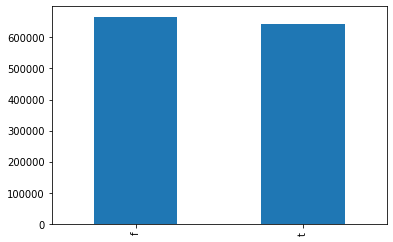

In [12]:
dfc_calendar['available'].value_counts().plot.bar()

#### Price missing values

> The prices missing are because the available value.

#### Converting values

In [13]:
convert_monetary(dfc_calendar,'price')
convert_binary_column(dfc_calendar,'available')

In [14]:
dfc_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,False,0.0
1,12147973,2017-09-04,False,0.0
2,12147973,2017-09-03,False,0.0
3,12147973,2017-09-02,False,0.0
4,12147973,2017-09-01,False,0.0


#### Question 1: Is there a difference in the price of accommodation during the year?


To answer this question, it is necessary to calculate the average price of accommodation. We must ignore accommodations with a value of zero, as they are accommodations that are not available and these accommodations are also unavailable.

#### Calculating the mean price for each month desconsidering the homestays with price equal zero

In [34]:
dfc_calendar['year'] = pd.to_datetime(dfc_calendar['date']).dt.year
dfc_calendar['month'] = pd.to_datetime(dfc_calendar['date']).dt.month

In [35]:
mp = dfc_calendar[dfc_calendar['price'] > 0].groupby(['year','month'])['price'].mean()
mp

year  month
2016  9        252.677307
      10       233.416245
      11       202.924423
      12       192.601913
2017  1        182.799667
      2        180.961029
      3        181.818741
      4        197.252884
      5        193.712296
      6        196.535309
      7        202.486313
      8        203.330139
      9        194.658325
Name: price, dtype: float32

#### Plotting the mean price considering all homestays price in each month

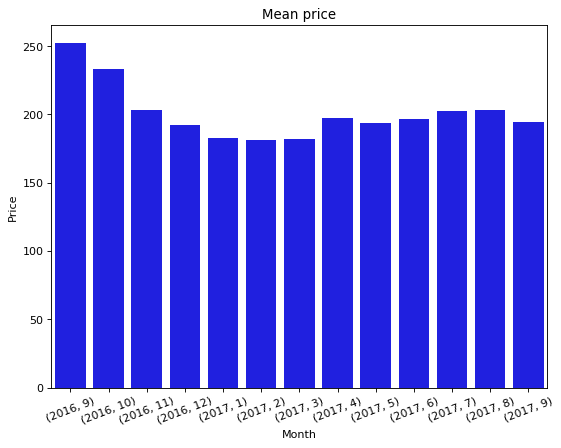

In [36]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
price_mean = sns.barplot(x=mp.index,y=mp.values,color="blue")
price_mean.set(xlabel='Month', ylabel='Price')
price_mean.set_title('Mean price')
plt.xticks(rotation=21)
figure = price_mean.get_figure()    
plt.savefig('mean_price.png', dpi=1024)

In [37]:
dfc_calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'year', 'month'], dtype='object')

> The average price of accommodation with values greater than 0 (that is, those available) was calculated. The result is shown in figure. So the answer to the first is yes, there is a difference in the price of accommodation each month. But wait! The average price presented in the first month is due to the number of registered accommodations, the average is a measure that is influenced by extreme values, however, as the number of accommodations increases, the extreme prices will have less impact on the average. January 2017 is the month with the highest number of accommodations available, so the average decreases until January 2017 and remains stable in the other months.

> Through in this figure, it is not possible to draw so many conclusions. So, let's check the number of accommodations that reach the lowest and highest price in the period of 13 months.

#### Checking and analyzing the result table

In [23]:
sum(dfg['price']['min'] < dfg['price']['max'])

1873

In [24]:
sum(dfg['price']['min'] == dfg['price']['max'])

1033

#### Calculating the proportion of the homestays that doesn't change the price anytime

In [25]:
1873/(1873+1033),1033/(1873+1033),

(0.6445285615966965, 0.35547143840330353)

> It is important to highlight that 36% of the accommodations did not change the price during the 13 months, while 64% increased or decreased the price. 

#### Analyzing the price for rows with available value equal True

In [15]:
dfg = dfc_calendar[(dfc_calendar['available'] == True)].groupby('listing_id').agg({'price':['count','mean', 'std','min','max']})

In [16]:
dfg.head()

price                                     
           count        mean        std    min    max
listing_id                                           
3353         249   35.204819   1.302222   32.0   36.0
5506         344  147.267441  17.043196  145.0  275.0
6695         324  197.407410  17.553301  195.0  325.0
6976         319   65.000000   0.000000   65.0   65.0
8792         248  154.000000   0.000000  154.0  154.0

#### Separating rows with price more than zero

In [17]:
t = dfc_calendar[(dfc_calendar['price'] > 0.0)]

#### Getting the rows that have minimum values for each id

In [18]:
tt = t.loc[t.groupby('listing_id')['price'].idxmin()] 

#### Creating two new columns to save the year and month, the date with minimum price

In [19]:
tt['year'] = pd.to_datetime(tt['date']).dt.year
tt['month'] = pd.to_datetime(tt['date']).dt.month

In [20]:
tt.head()

,listing_id,date,available,price,year,month
1207578,3353,2017-01-14,True,32.0,2017,1
284700,5506,2017-09-05,True,145.0,2017,9
312075,6695,2017-09-05,True,195.0,2017,9
730,6976,2017-05-12,True,65.0,2017,5
770150,8792,2017-09-05,True,154.0,2017,9


#### Counting ids in each month

In [21]:
tt['month'].value_counts()

9     1051
12     488
3      232
2      218
1      142
6      142
11     138
7      121
10     118
8      107
5       82
4       67
Name: month, dtype: int64

#### Getting and date of the rows that have maximum values for each id

In [22]:
ttt = t.loc[t.groupby('listing_id')['price'].idxmax()] 
ttt['year'] = pd.to_datetime(ttt['date']).dt.year
ttt['month'] = pd.to_datetime(ttt['date']).dt.month
ttt['month'].value_counts()

9     917
10    396
12    327
4     290
8     172
11    170
6     157
3     136
7     133
5     112
1      75
2      21
Name: month, dtype: int64

#### Showing the homestays that change the price 

In [26]:
dfg[dfg['price']['min'] < dfg['price']['max']].head()

price                                     
           count        mean        std    min    max
listing_id                                           
3353         249   35.204819   1.302222   32.0   36.0
5506         344  147.267441  17.043196  145.0  275.0
6695         324  197.407410  17.553301  195.0  325.0
9765         362  236.856354  41.440693  192.0  490.0
9824         323  222.321976  46.645836  209.0  490.0

#### Selecting the index with the minimum and maximum price of each homestay

In [27]:
dfg = dfc_calendar[(dfc_calendar['available'] == True)].groupby('listing_id').agg({'price':['count','mean', 'std','min','max','idxmax','idxmin']})

In [28]:
dfg.head()

price                                                       
           count        mean        std    min    max   idxmax   idxmin
listing_id                                                             
3353         249   35.204819   1.302222   32.0   36.0  1207420  1207578
5506         344  147.267441  17.043196  145.0  275.0   284838   284700
6695         324  197.407410  17.553301  195.0  325.0   312215   312075
6976         319   65.000000   0.000000   65.0   65.0      730      730
8792         248  154.000000   0.000000  154.0  154.0   770150   770150

#### Analyzing the date of homestays wirh lowest and highest price 

In [29]:
dfg['date_min'] = dfc_calendar.reindex(dfg['price']['idxmin'])['date'].values
dfg['date_max'] = dfc_calendar.reindex(dfg['price']['idxmax'])['date'].values

In [30]:
dfg.head()

price                                                         \
           count        mean        std    min    max   idxmax   idxmin   
listing_id                                                                
3353         249   35.204819   1.302222   32.0   36.0  1207420  1207578   
5506         344  147.267441  17.043196  145.0  275.0   284838   284700   
6695         324  197.407410  17.553301  195.0  325.0   312215   312075   
6976         319   65.000000   0.000000   65.0   65.0      730      730   
8792         248  154.000000   0.000000  154.0  154.0   770150   770150   

              date_min    date_max  
                                    
listing_id                          
3353        2017-01-14  2017-09-05  
5506        2017-09-05  2017-04-18  
6695        2017-09-05  2017-04-18  
6976        2017-05-12  2017-05-12  
8792        2017-09-05  2017-09-05

#### Separating the month and the year of dates of homestays wirh lowest and highest price

In [31]:
dfg['year_min'] = pd.to_datetime(dfg['date_min']).dt.year
dfg['month_min'] = pd.to_datetime(dfg['date_min']).dt.month
dfg['year_max'] = pd.to_datetime(dfg['date_max']).dt.year
dfg['month_max'] = pd.to_datetime(dfg['date_max']).dt.month
dfg.head()

price                                                         \
           count        mean        std    min    max   idxmax   idxmin   
listing_id                                                                
3353         249   35.204819   1.302222   32.0   36.0  1207420  1207578   
5506         344  147.267441  17.043196  145.0  275.0   284838   284700   
6695         324  197.407410  17.553301  195.0  325.0   312215   312075   
6976         319   65.000000   0.000000   65.0   65.0      730      730   
8792         248  154.000000   0.000000  154.0  154.0   770150   770150   

              date_min    date_max year_min month_min year_max month_max  
                                                                          
listing_id                                                                
3353        2017-01-14  2017-09-05     2017         1     2017         9  
5506        2017-09-05  2017-04-18     2017         9     2017         4  
6695        2017-09-05  2017-04-18     2017         9     2017         4  
6976        2017-05-12  2017-05-12     2017         5     2017         5  
8792        2017-09-05  2017-09-05     2017         9     2017         9

#### Plotting the count of homestays that reach the minimum price in that month

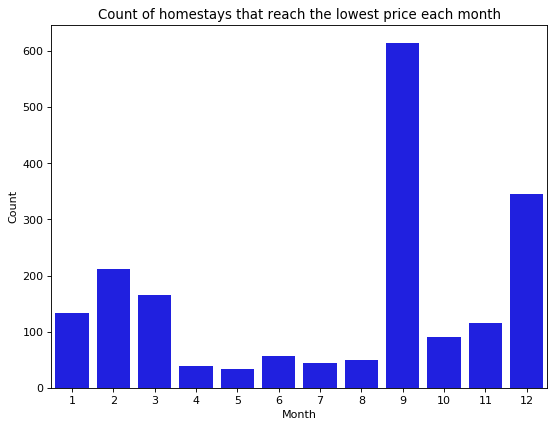

In [32]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
t1 = dfg[dfg['price']['std'] != 0]['month_min'].value_counts().sort_index()
ax_max = sns.barplot(x=t1.index,y=t1.values,color="blue")
ax_max.set_title('Count of homestays that reach the lowest price each month')
ax_max.set(xlabel='Month', ylabel='Count')
figure = ax_max.get_figure()    
plt.savefig('count_min.png', dpi=1024)
plt.show()

#### Plotting the count of homestays that reach the maximo price in that month

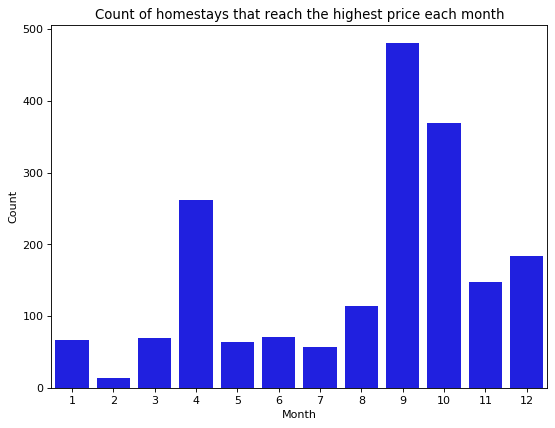

In [33]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
t1 = dfg[dfg['price']['std'] != 0]['month_max'].value_counts().sort_index()
ax_max = sns.barplot(x=t1.index,y=t1.values,color="blue")
ax_max.set_title('Count of homestays that reach the highest price each month')
ax_max.set(xlabel='Month', ylabel='Count')
figure = ax_max.get_figure()    
plt.savefig('count_max.png', dpi=1024)
plt.show()

> Number of accommodations that reached the highest / lowest price each month.
> The number of higher priced accommodations in April and September are explained by the marathon and carnival that take place in the respective months.

> These are major annual events that move the city a lot and contribute to this behavior in the price of accommodation.

> Despite the increase in the number of accommodations that reach the maximum price in the months of April, September and October, there are accommodations that have not changed the price, in addition to accommodations that are cheaper in these periods.

> Considering that the desire is to travel to the Boston marathon in April, so let's focus on a more restricted analysis for this period.

#### Counting and plotting the available homestays in all months

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

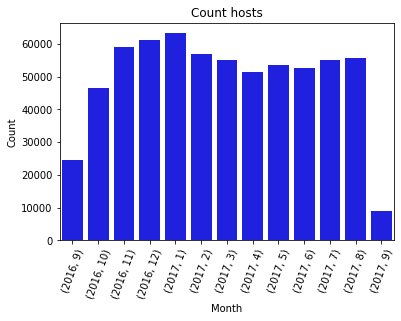

In [38]:
coutns = dfc_calendar[dfc_calendar['available'] == True].groupby(['year','month'])['price'].count()
counts_fig = sns.barplot(x=coutns.index,y=coutns.values,color="blue")
counts_fig.set(xlabel='Month', ylabel='Count')
counts_fig.set_title('Count hosts')
plt.xticks(rotation=70)

#### Plotting boxplot of mean price in all months

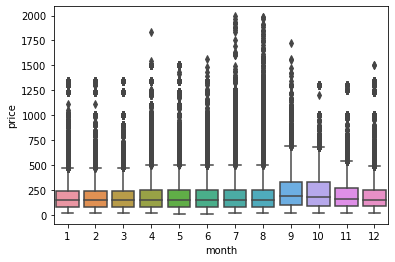

In [39]:
sns.boxplot(data=dfc_calendar[(dfc_calendar['price'] > 0) & (dfc_calendar['price'] < 2000)],x='month',y='price')

#### Just a view

In [40]:
dfc_calendar.head()

,listing_id,date,available,price,year,month
0,12147973,2017-09-05,False,0.0,2017,9
1,12147973,2017-09-04,False,0.0,2017,9
2,12147973,2017-09-03,False,0.0,2017,9
3,12147973,2017-09-02,False,0.0,2017,9
4,12147973,2017-09-01,False,0.0,2017,9


#### Question 2: What is the cheapest neighborhood? And which is the most expensive?

To answer this question, it will be necessary to extract the price and neighborhood information, which are in different files, and then combine these data.

#### Calculating mean price of each homestay

In [41]:
prices = dfc_calendar[dfc_calendar['price'] > 0].groupby(['listing_id'])['price'].mean()

In [42]:
prices = prices.reset_index()

In [43]:
prices.head()

,listing_id,price
0,3353,35.204819
1,5506,147.267441
2,6695,197.407410
3,6976,65.000000
4,8792,154.000000


#### Reading the listings.csv and viewing few rows to have a look at the dataframe

In [44]:
df_listings = pd.read_csv('listings.csv')
dfc_listings = df_listings.copy()

In [45]:
dfc_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.","The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.","Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pric",none,"Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If you are cooking the Fish Market has fresh fish daily; Tony's makes his own sausages and has Italian foods; for a wide variety of delicious cheeses and chocolates go to the Cheese Cellar on Birch St.",NaN,"The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home. Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.","You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.",NaN,Cle

#### Removing columns with no diversity

In [46]:
dfc_listings = dfc_listings.drop(columns=['experiences_offered','neighbourhood_group_cleansed','has_availability','requires_license',
   'license','jurisdiction_names','square_feet'])

#### Fixing columns with binary values

In [47]:
temp_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact']
for tc in temp_columns:
    dfc_listings[tc] = dfc_listings[tc].apply(lambda x: True if x == 't' else False)

#### Fixing columns with monetary values

In [48]:
convert_monetary(dfc_listings,'cleaning_fee')
dfc_listings['cleaning_fee'].head()

0    35.0
1    10.0
2     0.0
3    50.0
4    15.0
Name: cleaning_fee, dtype: float32

In [49]:
convert_monetary(dfc_listings,'security_deposit')
dfc_listings['security_deposit'].head()

0      0.0
1     95.0
2      0.0
3    100.0
4      0.0
Name: security_deposit, dtype: float32

#### Counting the number of homestays in each neighbourhood and visualizing

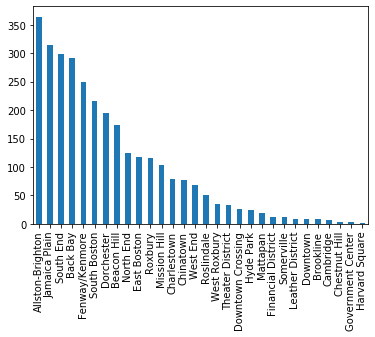

In [50]:
dfc_listings['neighbourhood'].value_counts().plot(kind='bar')

In [51]:
dfc = dfc_listings['neighbourhood'].value_counts()

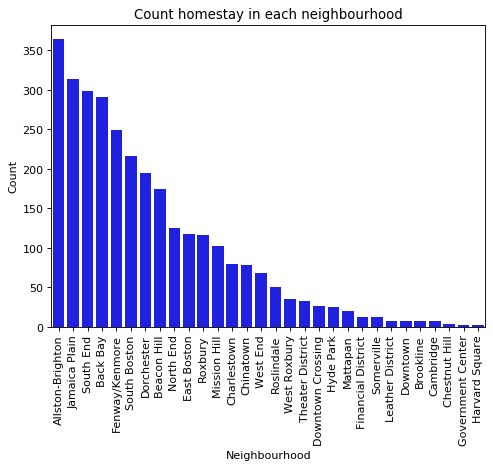

In [52]:
plot_value_counts(dfc,'Count homestay in each neighbourhood','Neighbourhood','Count','count_neigh.png',90,7,5)

#### Calculating the mean price in mach, april and may

In [53]:
dfc_34 = dfc_calendar[dfc_calendar['month'].isin([3,4,5])].groupby(['listing_id','month'])['price'].mean().reset_index()

In [54]:
dfc_34.head()

,listing_id,month,price
0,3353,3,35.354839
1,3353,4,36.000000
2,3353,5,36.000000
3,5506,3,145.000000
4,5506,4,171.000000


#### Pivoting the table, became the values into columns

In [55]:
dfc = dfc_34.pivot(index='listing_id', columns='month', values='price').reset_index()
dfc.head()

month,listing_id,3,4,5
0,3353,35.354839,36.0,36.0
1,5506,145.000000,171.0,145.0
2,6695,195.000000,221.0,195.0
3,6976,65.000000,65.0,65.0
4,8792,154.000000,154.0,154.0


#### Renaming the columns

In [56]:
dfc.rename(columns={3:'march',4:'april',5:'may'},inplace=True)
dfc.columns

Index(['listing_id', 'march', 'april', 'may'], dtype='object', name='month')

#### Calculating the differences between months

In [57]:
dfc['diff'] = dfc['march']-dfc['april']
dfc['diff2'] = dfc['april']-dfc['may']

#### Calculating how many homestays improved/decreased the price in mach, april and may

In [58]:
dfc[dfc['diff'] > 0].shape,dfc[dfc['diff'] < 0].shape,dfc[dfc['diff'] == 0].shape

((546, 6), (707, 6), (2332, 6))

In [80]:
546/dfc.shape[0],707/dfc.shape[0],2332/dfc.shape[0]

(0.15230125523012553, 0.19721059972105998, 0.6504881450488145)

In [60]:
dfc[dfc['diff2'] > 0].shape,dfc[dfc['diff2'] < 0].shape,dfc[dfc['diff2'] == 0].shape

((565, 6), (396, 6), (2624, 6))

> 65% of accommodations do not change the price from March to April. 15% decrease and 19% of the accommodation prices increase in April. An interesting behavior is that 3% of the accommodations increase the price in the month of April and return to the previous price in May. And 2% of the accommodations have the opposite behavior, decrease the price in the month of April and return to the previous price in May. They change the price during the marathon period. This behavior may be repeated during the rest of the year in other events.

#### Analyzing how many homestays decreased

In [61]:
dfc[dfc['diff'] > 0].head()

month,listing_id,march,april,may,diff,diff2
21,12441,399.000000,356.833344,399.000000,42.166656,-42.166656
32,23619,177.903229,145.666672,177.580643,32.236557,-31.913971
41,29765,295.000000,279.466675,295.000000,15.533325,-15.533325
77,93505,199.000000,185.733337,199.000000,13.266663,-13.266663
83,163941,230.806458,192.166672,230.161285,38.639786,-37.994614


In [62]:
dfc[dfc['diff2'] > 0].head()

month,listing_id,march,april,may,diff,diff2
1,5506,145.0,171.000000,145.0,-26.000000,26.000000
2,6695,195.0,221.000000,195.0,-26.000000,26.000000
6,9765,229.0,281.200012,229.0,-52.200012,52.200012
7,9824,209.0,274.566681,209.0,-65.566681,65.566681
9,9857,342.0,426.000000,342.0,-84.000000,84.000000


> 3% of hospegens increase the price in April and return to the previous price in May. 2% of hospegens lower the price in April and return to the previous price in May. They change the price during the marathon period. This behavior may be repeated for the rest of the year.

#### Calculating the homestays proportion with improved price in april

In [63]:
len(dfc[(dfc['march'] == dfc['may']) & (dfc['march'] < dfc['april'])])/dfc.shape[0]

0.0301255230125523

#### Calculating the homestays proportion with descreased price in april

In [64]:
len(dfc[(dfc['march'] == dfc['may']) & (dfc['march'] > dfc['april'])])/dfc.shape[0]

0.02203626220362622

In [65]:
2332/3585,707/3585,546/3585

(0.6504881450488145, 0.19721059972105998, 0.15230125523012553)

In [66]:
len(dfc['listing_id'].unique())

3585

#### Analyzing how many homestays there are in each neighbourhood and visualizing

In [67]:
list_neighbourhood = dfc_listings['neighbourhood'].value_counts().index

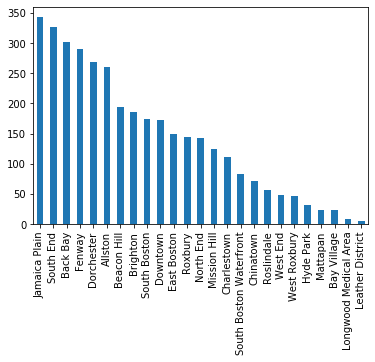

In [68]:
dfc_listings['neighbourhood_cleansed'].value_counts().plot(kind='bar',)

#### Join the dataframes to calculate the mean price of each neighbourhood.

In [69]:
dfc_listings = dfc_listings.merge(dfc, left_on='id', right_on='listing_id')
dfc_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,march,april,may,diff,diff2
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation.","The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.","Cozy, sunny, family home. Master bedroom high ceilings. Deck, garden with hens, beehives & play structure. Short walk to charming village with attractive stores, groceries & local restaurants. Friendly neighborhood. Access public transportation. The house has an open and cozy feel at the same time. The living room has a flat screen TV. The kitchen has all you need for cooking. We prefer you buy your food but can use the organic oils, herbs, etc. The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way. We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure. You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard. Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pric","Roslindale is quiet, convenient and friendly. For Southern food try Redd's in Rozzie. Italian Delfino's or Sophia's Grotto are great. Birch St Bistro has nice atmostphere--a little pricier. If you are cooking the Fish Market has fresh fish daily; Tony's makes his own sausages and has Italian foods; for a wide variety of delicious cheeses and chocolates go to the Cheese Cellar on Birch St.",NaN,"The bus stop is 2 blocks away, and frequent. Bus is about a 10 minute ride to the Orange line, forest hills. The commuter rail into down town is a 6 minute walk from our home. Walking is pleasant and restaurants, shops and grocery store are all a 6 minute walk away.","You will have access to 2 bedrooms, a living room, kitchen, bathrooms, and yard.",NaN,Clean up and treat the home the way you'd like your home to be treated. No smoking.,https://

#### Just listing the neighbourhood

In [70]:
list_neighbourhood

Index(['Allston-Brighton', 'Jamaica Plain', 'South End', 'Back Bay',
       'Fenway/Kenmore', 'South Boston', 'Dorchester', 'Beacon Hill',
       'North End', 'East Boston', 'Roxbury', 'Mission Hill', 'Charlestown',
       'Chinatown', 'West End', 'Roslindale', 'West Roxbury',
       'Theater District', 'Downtown Crossing', 'Hyde Park', 'Mattapan',
       'Financial District', 'Somerville', 'Leather District', 'Downtown',
       'Brookline', 'Cambridge', 'Chestnut Hill', 'Government Center',
       'Harvard Square'],
      dtype='object')

#### Calculating the  mean neighbourhood price in april

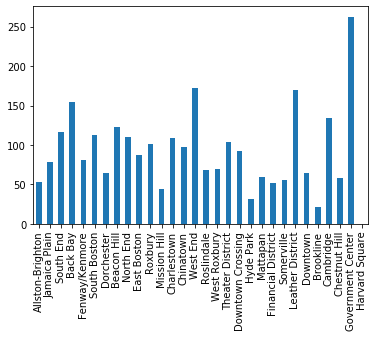

In [71]:
dfc_listings.groupby('neighbourhood')['april'].mean()[list_neighbourhood].plot(kind='bar')
#bar_ax = sns.barplot(ax=ax,data=dfc_listings,x='neighbourhood',y='price_y',hue='room_type',order=list_neighbourhood)

> The finish line for the marathon is located at Copley Square, next to the Boston Public Library, in the Back Bay neighborhood (https://pt.wikipedia.org/wiki/Marathon_Boston). We will calculate the average position of the neighborhoods considering the coordinates of the accommodations and measure the distance in a straight line in kilometers between each neighborhood and the point of arrival of the marathon that is in the Back Bay neighborhood.

#### Converting to Haver distance and joing into dataframe

In [72]:
dfc_dist = dfc_listings.groupby('neighbourhood')[['latitude','longitude']].mean().reset_index()
dfc_dist.head()

,neighbourhood,latitude,longitude
0,Allston-Brighton,42.351369,-71.139800
1,Back Bay,42.349543,-71.080150
2,Beacon Hill,42.359162,-71.067222
3,Brookline,42.341502,-71.125128
4,Cambridge,42.363323,-71.108006


In [73]:
dfc_dist['dist'] = dfc_dist.apply(lambda x: haversine_vectorize(x['longitude'],x['latitude']),axis=1)

#### Sorting the dataframe based on distance in ascending order

In [74]:
dfc_dist.sort_values(['dist']).head()

,neighbourhood,latitude,longitude,dist
1,Back Bay,42.349543,-71.080150,0.330641
26,South End,42.342303,-71.074069,0.915764
27,Theater District,42.351793,-71.064242,1.001537
7,Chinatown,42.350705,-71.061584,1.207927
2,Beacon Hill,42.359162,-71.067222,1.227497


#### Creating a dataframe with the neighbourhood and mean neighbourhood price

In [75]:
dfc2 = dfc_listings.groupby('neighbourhood')['april'].mean().reset_index()
dfc2.head()

,neighbourhood,april
0,Allston-Brighton,52.705952
1,Back Bay,154.333450
2,Beacon Hill,122.671265
3,Brookline,21.533333
4,Cambridge,134.661911


#### Creating a dataframe with the neighbourhood and homestay count

In [76]:
dfc3 = dfc_listings.groupby('neighbourhood')['id'].count().reset_index()
dfc3.head()

,neighbourhood,id
0,Allston-Brighton,364
1,Back Bay,291
2,Beacon Hill,174
3,Brookline,8
4,Cambridge,7


#### Merging the dataframes

In [82]:
dfList = [dfc_dist,dfc2,dfc3]
dfc_dist = reduce(lambda x, y: pd.merge(x, y, on = 'neighbourhood'), dfList)

In [ ]:
dfc_dist.columns

#### Dataframe after merged

In [83]:
dfc_dist.rename(columns={'id':'count','april':'price'},inplace=True)
dfc_dist.head()

,neighbourhood,latitude,longitude,dist,price,count
0,Allston-Brighton,42.351369,-71.139800,5.217275,52.705952,364
1,Back Bay,42.349543,-71.080150,0.330641,154.333450,291
2,Beacon Hill,42.359162,-71.067222,1.227497,122.671265,174
3,Brookline,42.341502,-71.125128,4.130981,21.533333,8
4,Cambridge,42.363323,-71.108006,2.975557,134.661911,7


In [84]:
dfc_dist_sort = dfc_dist.sort_values(by=['count'],ascending=False)

#### Creating a figure with three plots

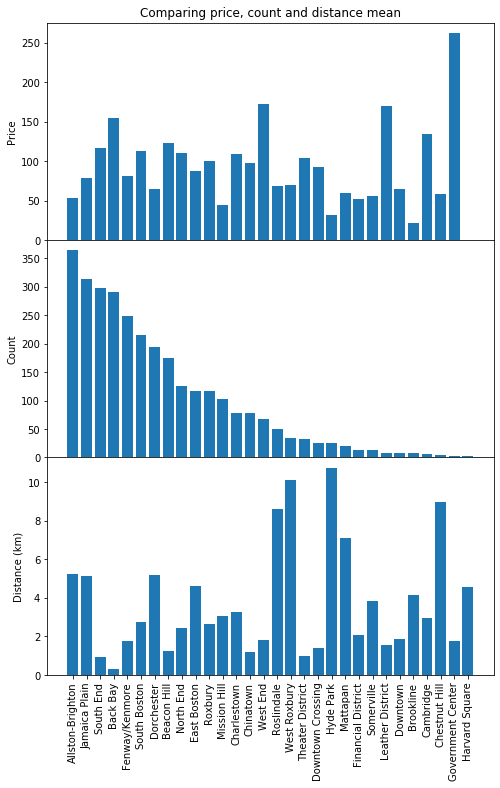

In [85]:
x = dfc_dist_sort['neighbourhood']
y = dfc_dist_sort['price']
z = dfc_dist_sort['count']
w = dfc_dist_sort['dist']
fig, axs = plt.subplots(3, 1, sharex=True,figsize=(8, 12))
fig.subplots_adjust(hspace=0)
#fig.suptitle('Comparing price, count and distance mean between neighbourhood', fontsize=12)
axs[0].set_title('Comparing price, count and distance mean')
axs[0].bar(x, y)
axs[0].set_ylabel('Price')
axs[1].bar(x, z)
axs[1].set_ylabel('Count')
axs[2].bar(x, w)
axs[2].set_ylabel('Distance (km)')
_ = plt.xticks(rotation=90)
plt.savefig('comp2.png', bbox_inches='tight', dpi = 100)

> Back Bay is the neighborhood where the Boston marathon finish line is located and one of the neighborhoods with the most accommodations in the period. South End and Chinatown are between the two neighborhoods closest to the finish line, being 1.9 km the furthest from them. South End has more lodging options. However Chinatown has the lowest average price. If you don't have accommodation available in Back Bay, or a cheaper option, South End and Chinatown are excellent neighborhood options.

#### Visualizing the neighbourhood information I just identified before

In [86]:
dfc_dist_sort[dfc_dist_sort['neighbourhood'].isin(['South End', 'Chinatown'])].head()

,neighbourhood,latitude,longitude,dist,price,count
26,South End,42.342303,-71.074069,0.915764,116.854919,298
7,Chinatown,42.350705,-71.061584,1.207927,97.789742,78


> The South End has an average accommodation distance of 900 m from Copley Square in Back Bay, while Chinatown is 1.9 km. Let's check the types of rooms that these neighborhoods have.

#### Analyzing the South End and Chinatown neighborhoods

In [87]:
dfc_list_neig = dfc_listings[(dfc_listings['april'] > 0) & (dfc_listings['neighbourhood'].isin(['South End', 'Chinatown']))]
dfc_list_neig.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,march,april,may,diff,diff2
557,3401809,https://www.airbnb.com/rooms/3401809,20160906204935,2016-09-07,[1857-1]1BR At Radian Apartments,.,"Radian offers fantastic modern apartment homes with fully-equipped kitchens, over-sized windows, sleek modern finishes, Plyboo flooring and much more. Radian has been designed with environmentally responsible materials and systems to achieve LEED certification from the U.S. Green Building Council. With original works of art throughout amenity spaces, luxuriously designed entertainment rooms, an innovative fitness center and personalized services provided by a 24/7 concierge, Radian creates a truly cosmopolitan atmosphere tailored for contemporary living. Also residents can enjoy a convenient location with nearby transportation hubs, making all areas of Boston easily accessible, along with the finest dining, shopping and entertainment. Radian is located close to key transportation hubs, making all areas of Boston and Logan International Airport easily accessible. Nearby South Station offers connections throughout the metropolitan area and the northeast via the T, the Silver Line, Amtrak",". Radian offers fantastic modern apartment homes with fully-equipped kitchens, over-sized windows, sleek modern finishes, Plyboo flooring and much more. Radian has been designed with environmentally responsible materials and systems to achieve LEED certification from the U.S. Green Building Council. With original works of art throughout amenity spaces, luxuriously designed entertainment rooms, an innovative fitness center and personalized services provided by a 24/7 concierge, Radian creates a truly cosmopolitan atmosphere tailored for contemporary living. Also residents can enjoy a convenient location with nearby transportation hubs, making all areas of Boston easily accessible, along with the finest dining, shopping and entertainment. Radian is located close to key transportation hubs, making all areas of Boston and Logan International Airport easily accessible. Nearby South Station offers connections throughout the metropolitan area and the northeast via the T, the Silver Line, Amtr",NaN,NaN,NaN,NaN,NaN,Pets Allowed ( With Fee ) NO Smoking,NaN,NaN,https://a0.muscache.com/im/pictures/90406270/48e4ec41_original.jpg?aki_policy=large,NaN,25188,https://www.airbnb.com/users/show/25188,Seamless,2009-07-10,US,"ABOUT US:\r\n\r\nSeamlessTransition is a full-service relocation agency. \r\n\r\nSeamlessTransition offers short-term housing options to executives, medical professionals and leisure travelers looking to secure transitional housing in major cities throughout the United States. \r\n\r\nWe match an individual's or family's sho

#### Visualizing the homestays count separed in room types in each neighbourhood

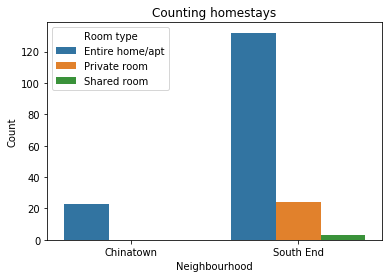

In [88]:
ax = sns.countplot(x='neighbourhood',data=dfc_list_neig,hue='room_type')
ax.set_title('Counting homestays')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')
plt.legend(title='Room type', loc='upper left', labels=['Entire home/apt','Private room','Shared room'])
_ = plt.savefig('sel_neigh.png', dpi = 50)

> Most lodgings are entire houses / apartments, and especially in the South End there are more than 120 lodgings of this type, while in Chinatown there are approximately 20. We know there are options. And as for prices, how is this variation?

#### Visualizing the mean neighbourhood price seperated in room type

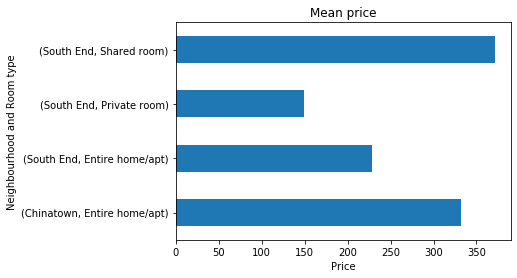

In [89]:
ax = dfc_list_neig.groupby(['neighbourhood','room_type'])['april'].mean().plot.barh()
ax.set_title('Mean price')
ax.set_ylabel('Neighbourhood and Room type')
ax.set_xlabel('Price')
_ = plt.savefig('sel_neigh_price.png',bbox_inches='tight', dpi = 100)

> In this figure, we can see that the shared room in South End is the most expensive of all, has the highest average. This is not so interesting. Private rooms are the most affordable. As with shared rooms, there may be more than one on site, another guest or the owner. Depending on the situation, private rooms are excellent value for money.

#### Visualizing the neighbourhood count seperated in number of accommodates

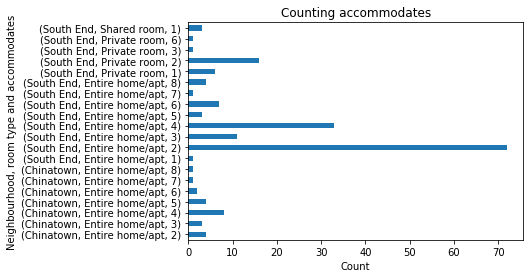

In [90]:
ax = dfc_list_neig.groupby(['neighbourhood','room_type','accommodates'])['april'].count().plot.barh()
ax.set_title('Counting accommodates')
ax.set_ylabel('Neighbourhood, room type and accommodates')
ax.set_xlabel('Count')
_ = plt.savefig('room_type__acom_count.png',bbox_inches='tight', dpi = 720)

> There are accommodations that accommodate 1 to 8 people. The majority accommodates 2 to 4 people. We will see the average price according to the accommodations.

#### Visualizing the mean neighbourhood price seperated in number of accommodates

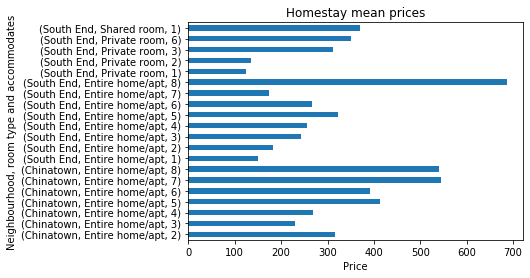

In [91]:
ax = dfc_list_neig.groupby(['neighbourhood','room_type','accommodates'])['april'].mean().plot.barh()
ax.set_title('Homestay mean prices')
ax.set_ylabel('Neighbourhood, room type and accommodates')
ax.set_xlabel('Price')
_ = plt.savefig('room_type__acom_price.png',bbox_inches='tight', dpi = 100)

> The figure shows that the number of accommodation options, mainly that accommodates 2 people, is considerable. And prices tend to increase as the number of accommodations increases, some situations do not follow this relationship. It is clear that South End prices are lower than in Chinatown considering the same amount of accommodation. This leads us to think that it is more worthwhile to stay in the South End, as it is cheaper and closer to the end of the marathon. Let's look at the average price per guest for each of the situations shown in figure.

In [92]:
dfc_rs = dfc_list_neig.groupby(['neighbourhood','room_type','accommodates'])['april'].mean().reset_index()

In [93]:
dfc_rs['prop'] = dfc_rs['april']/dfc_rs['accommodates']

In [94]:
dfc_rs = dfc_rs.groupby(['neighbourhood','room_type','accommodates']).apply(calc_prop)

In [95]:
dfc_rs['ind'] = '('+dfc_rs['neighbourhood']+','+dfc_rs['room_type']+','+str(dfc_rs['accommodates'])+')'

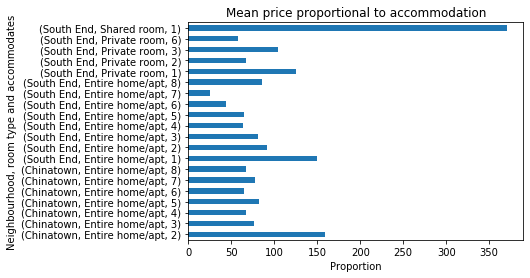

In [96]:
ax = dfc_rs.groupby(['neighbourhood','room_type','accommodates'])['prop'].mean().plot.barh()
ax.set_title('Mean price proportional to accommodation')
ax.set_ylabel('Neighbourhood, room type and accommodates')
ax.set_xlabel('Proportion')
_ = plt.savefig('room_type__acom_prop.png',bbox_inches='tight', dpi = 100)

> The observation that was made earlier can be seen more clearly in figure. The average price per guest decreases as the number of accommodations increases. Except for some situations, like the one observed with 8 accommodations in South End, where the value is higher than with 7. There are other factors that can contribute to this difference. As the average is very influenced by extreme values, there may be some accommodation that is influencing the average price. The difference between prices, from neighborhoods to accommodation with the same amount of accommodation, is small.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

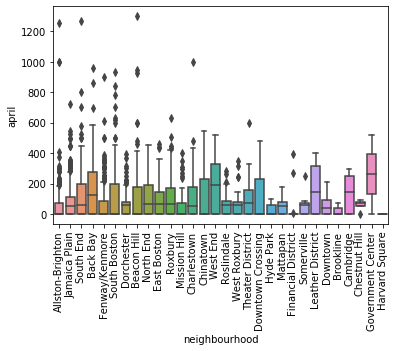

In [97]:
sns.boxplot(data=dfc_listings[dfc_listings['april'] < 1500],x='neighbourhood',y='april',order=list_neighbourhood)
plt.xticks(rotation=90)

## <a href='#conclusion'></a>5. Conclusion

> Boston is a city with many lodging options. The neighborhood that occurs at the end of the marathon is among the neighborhoods with the most accommodation options. If the desire is to stay close to the arrival of the marathon and pay cheap, there are two neighborhoods that I can recommend. South End and Chinatown, the latter being more distant. There are many options for accommodation with two accommodations but it may be more worthwhile to share an apartment with 4, 5, 6 or 8 people.